In [1]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

pd.set_option('display.max_columns', 100) # Print 100 Pandas columns

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb

import tensorflow as tf
from datetime import datetime
import os
import pathlib
from pathlib import Path



C:\Users\molin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
h_df = pd.read_csv('HainanClean.csv')
h_df.head()

,Year,Month,Day,Month #,Day #,Raw Biogas Produced (m3),BioCNG Produced （m3),BioCNG Sold (m3),Vehicle use (m3),Liquid Fertilizer Produced (t),Solid fertilizer produced (t),Wastewater flow to WWTP (unit?),Solid residues (kg),Pig Manure (t),Cassava (t),Fish waste water (t),Kitchen food waste (t),Municipal fecal residue (t),Tea waste (t),Chicken litter (t),Bagasse feed (t),Alcohol waste (t),Chinese medicine waste (t),Energy grass (t),Banana fruit shafts (t),Lemon waste (t),Percolate (t),Other waste (t),50% NaOH/kg,FeCl2/kg,PAM/kg,Defoamer/kg,Project electricity use/kWh,Office space electricity use/kWh,Water/m3,Diesel/L
0,2014,April,1,NaN,NaN,5154.0,1710.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0
1,2014,April,2,NaN,NaN,3426.0,1529.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0
2,2014,April,3,NaN,NaN,5885.0,1795.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0
3,2014,April,4,NaN,NaN,3727.0,1361.0,0.0,NaN,0.0,0.0,NaN,NaN,14.9,0.0,0.0,0.0,0.0,0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0
4,2014,April,5,NaN,NaN,4072.0,2436.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0


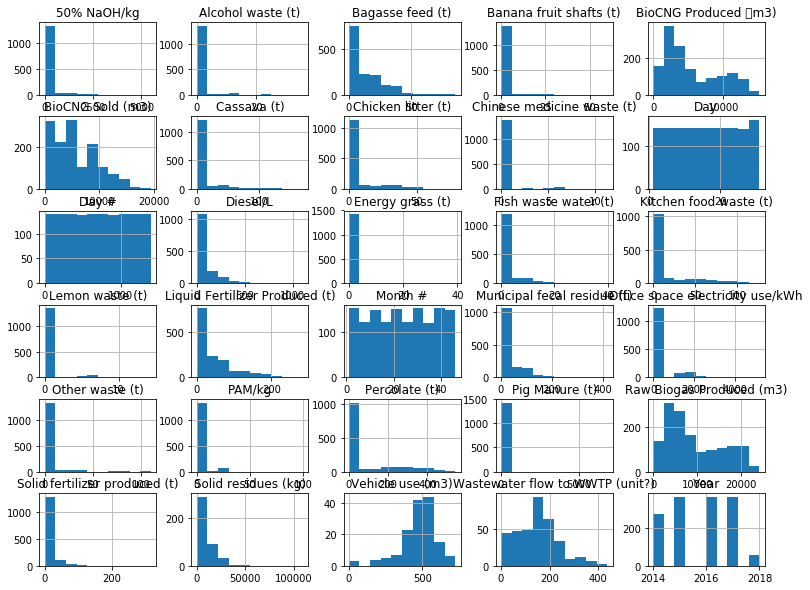

In [3]:
h_df.hist(figsize=(13,10))
plt.show()

List of outputs: ['Raw Biogas Produced (m3)' 'BioCNG Produced （m3)' 'BioCNG Sold (m3)'
 'Vehicle use (m3)' 'Liquid Fertilizer Produced (t)'
 'Solid fertilizer produced (t)' 'Wastewater flow to WWTP (unit?)']


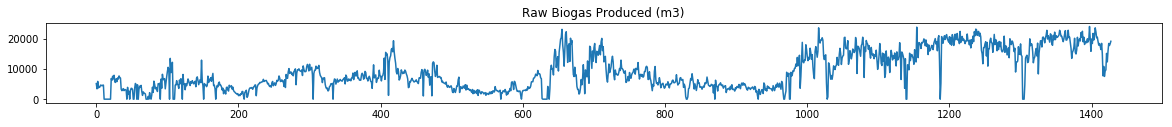

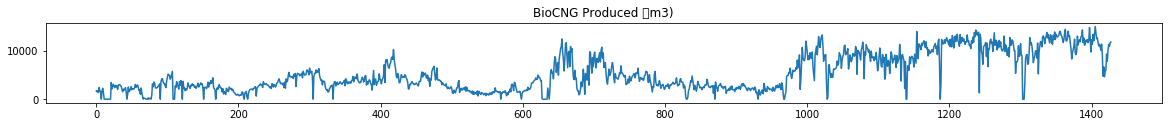

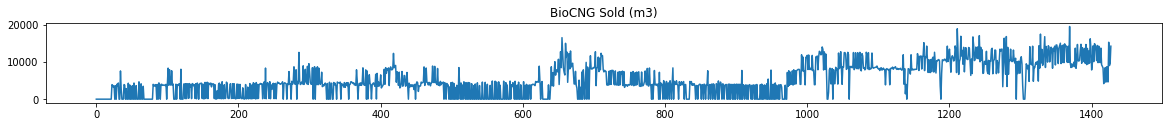

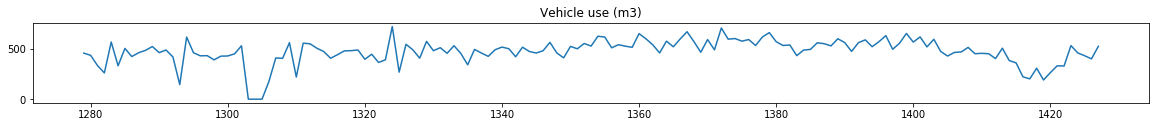

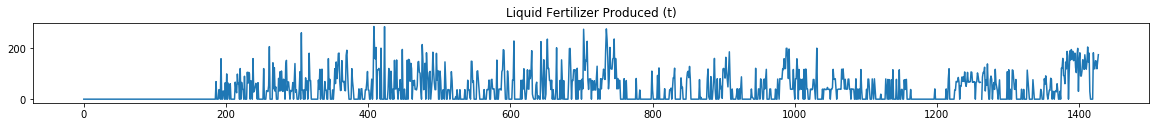

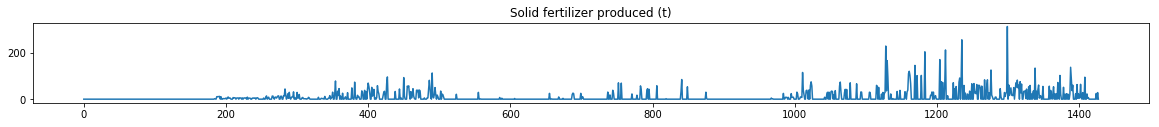

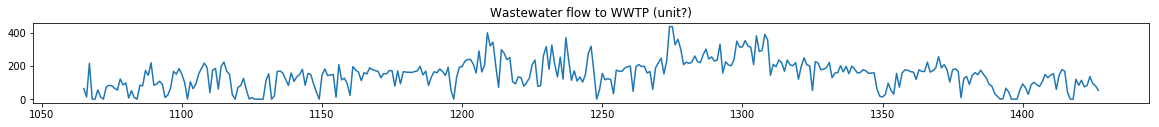

In [4]:
# outputs
columns = h_df.columns.values
columns_out = columns[5:12]
print('List of outputs:', columns_out)

# set size of graphs
#fig = plt.gcf()
#fig.set_size_inches(40, 40)

l = len(columns_out)/2
for i in columns_out:
    fig1 = plt.figure(figsize = (20,5))
    fig1.add_subplot(l,1,1).set_title(i)
    plt.plot(h_df[i])    
    

['Solid residues (kg)' 'Pig Manure (t)' 'Cassava (t)'
 'Fish waste water (t)' 'Kitchen food waste (t)'
 'Municipal fecal residue (t)' 'Tea waste (t)' 'Chicken litter (t)'
 'Bagasse feed (t)' 'Alcohol waste (t)' 'Chinese medicine waste (t)'
 'Energy grass (t)' 'Banana fruit shafts (t)' 'Lemon waste (t)'
 'Percolate (t)' 'Other waste (t)' '50% NaOH/kg' 'FeCl2/kg' 'PAM/kg'
 'Defoamer/kg' 'Project electricity use/kWh'
 'Office space electricity use/kWh' 'Water/m3' 'Diesel/L']


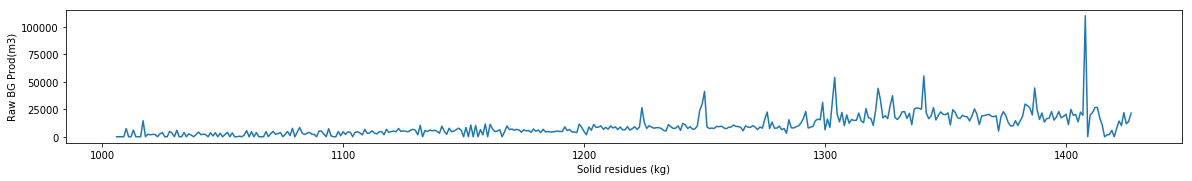

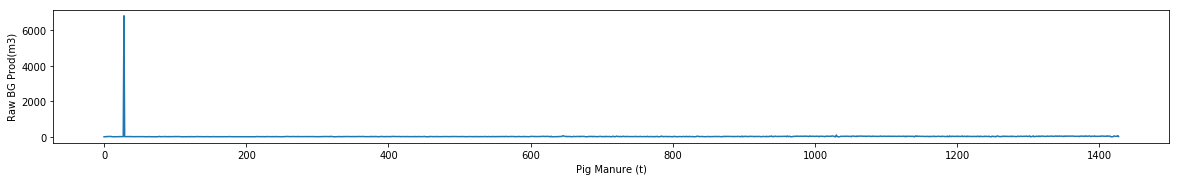

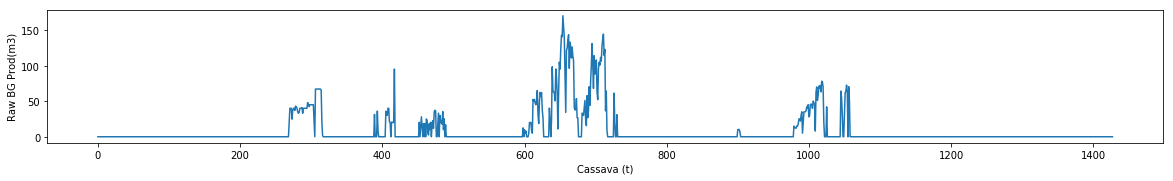

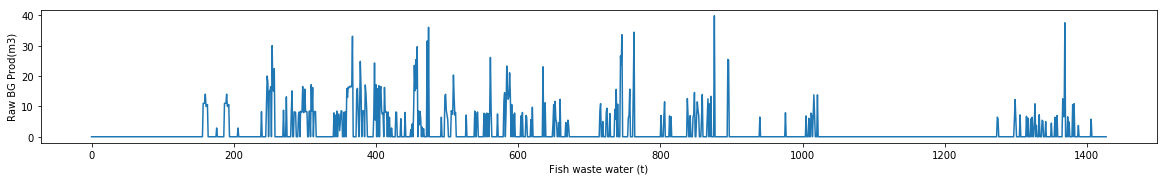

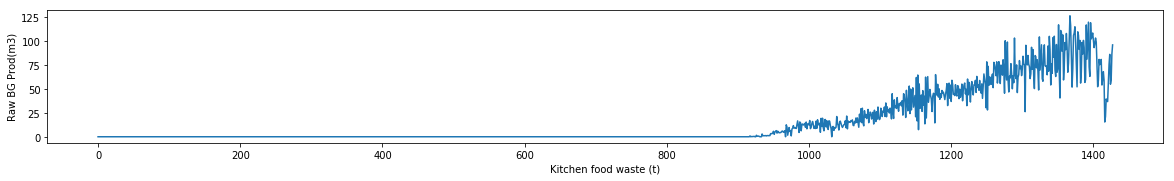

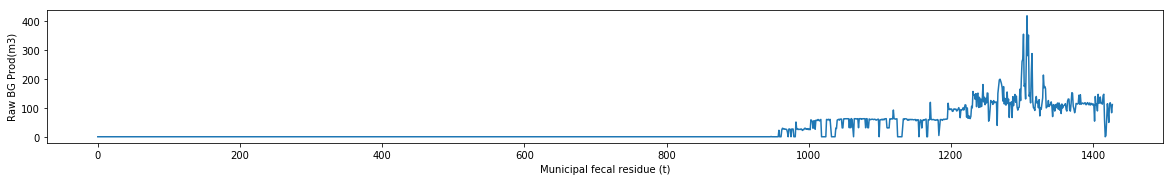

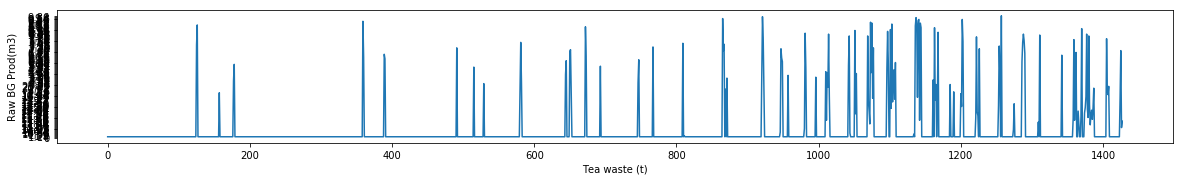

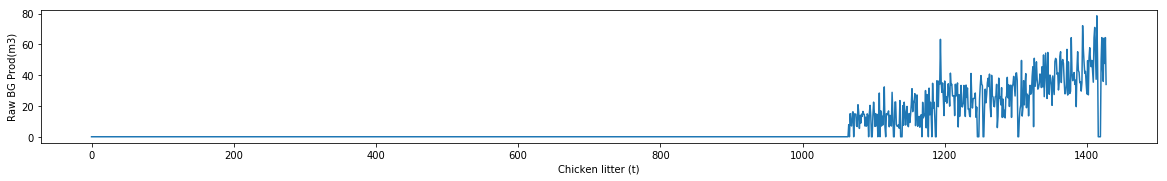

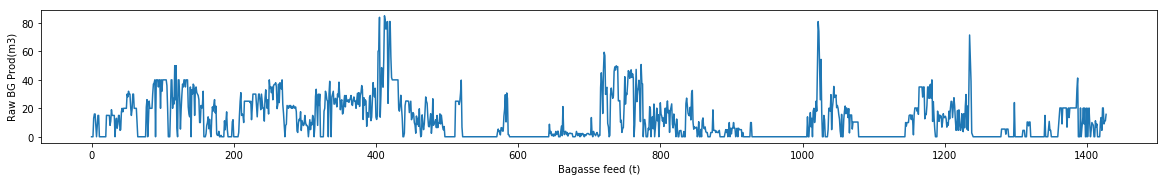

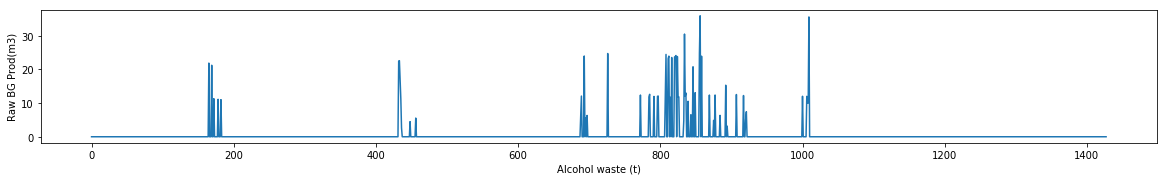

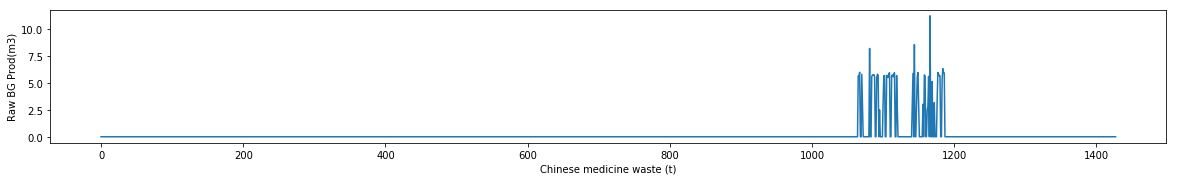

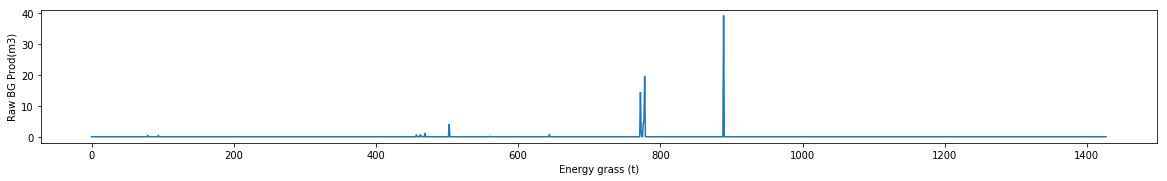

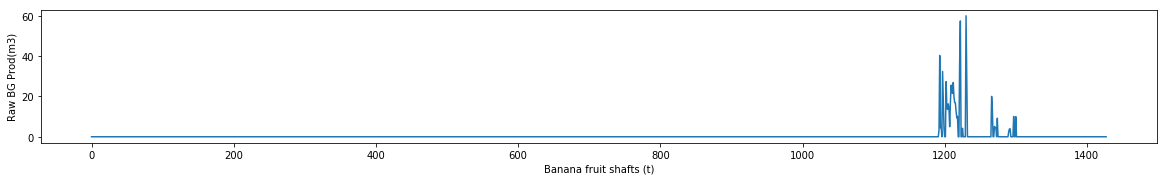

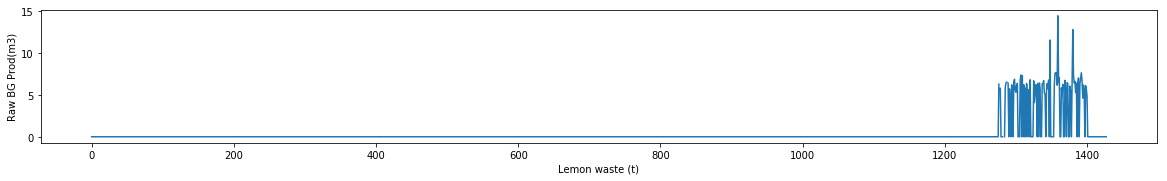

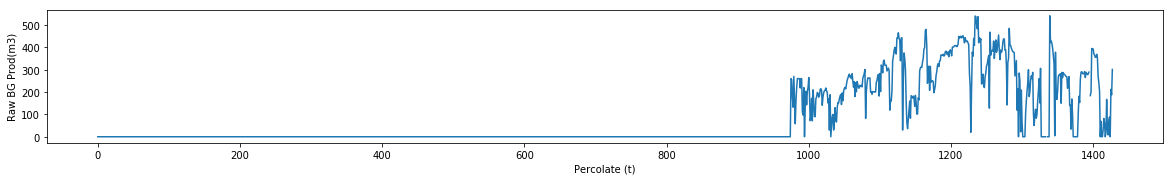

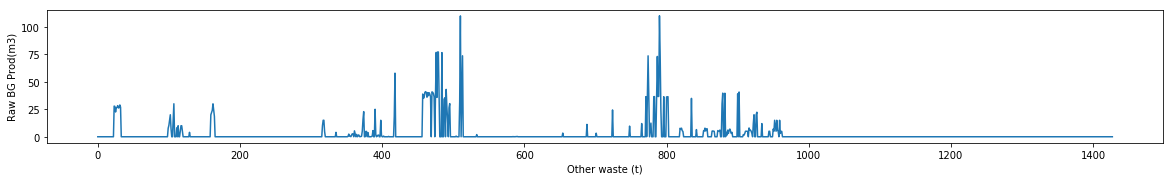

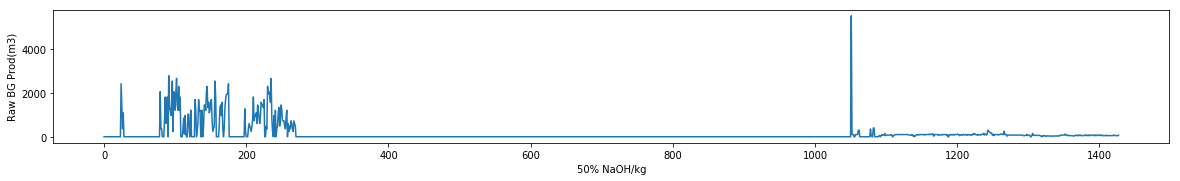

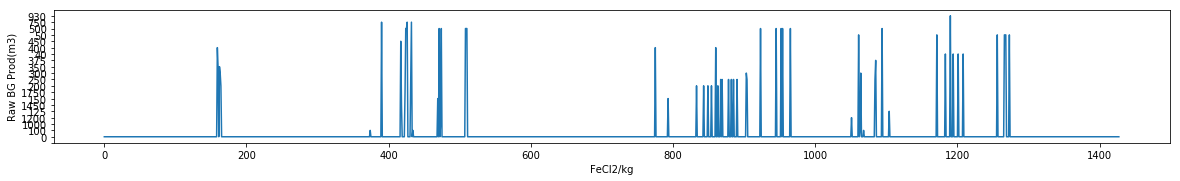

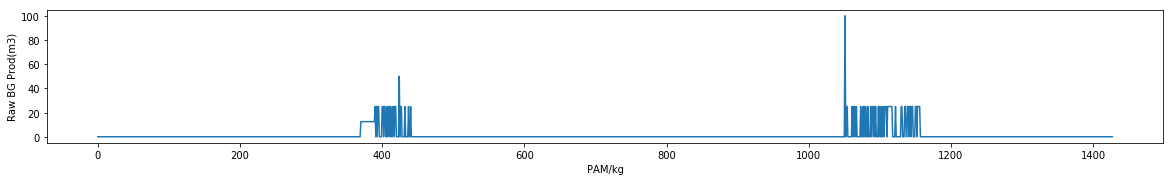

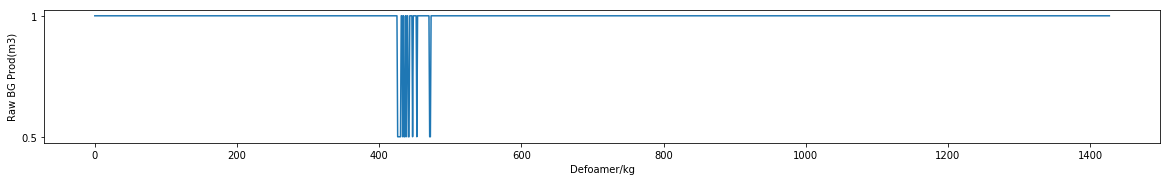

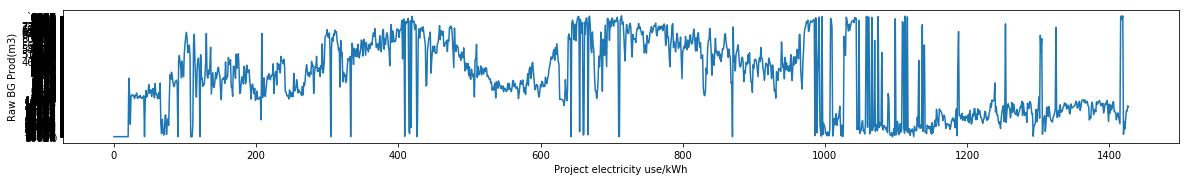

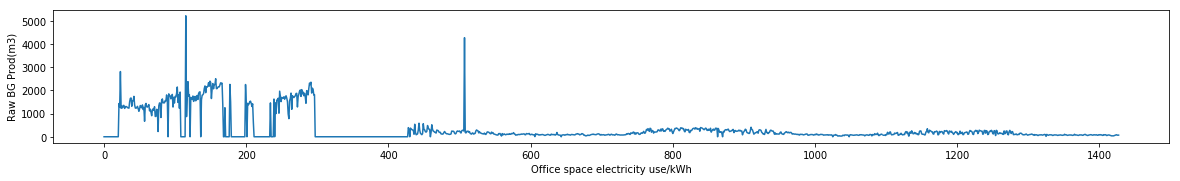

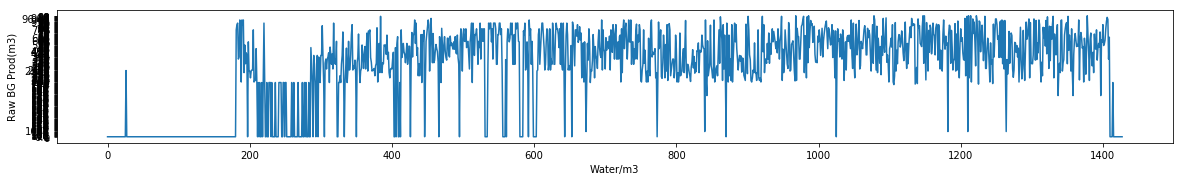

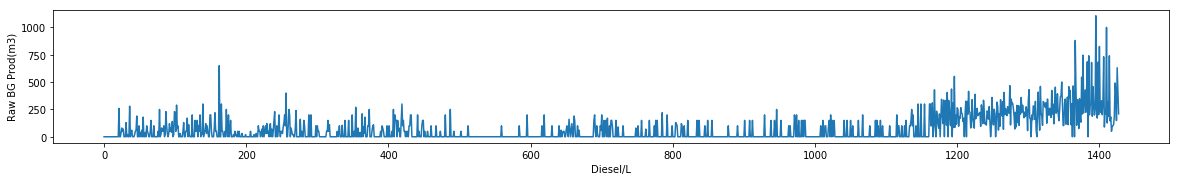

In [22]:
# inputs
columns_in = columns[12 :]
print(columns_in)


l = len(columns_in)
index = 1
for i in columns_in:
    fig2 = plt.figure(figsize = (20,70))
    fig2.add_subplot(l,1,1)
    plt.plot(h_df[i])
    plt.ylabel('Raw BG Prod(m3)')
    plt.xlabel(i)
    index = index + 1

In [6]:
null = h_df['Raw Biogas Produced (m3)'][h_df['Raw Biogas Produced (m3)'] == 0]
total_null = len(null)
print(total_null)

54


In [7]:
total_null = []
ratio_null = []
percent_null = []
for i in columns:
    null = h_df[i][h_df[i] == 0]
    total_null = total_null + [len(null)]
    ratio_null = ratio_null + [len(null)/len(h_df[i])]
    percent_null = percent_null + [(len(null)/len(h_df[i]))*100]
    
    
#print(total_null)
#print(ratio_null)
#print(percent_null)
data = [columns, total_null, ratio_null, percent_null]
print(data)

null_df = pd.DataFrame(data, ['name', 'total of 0', 'ratio', 'percent'])
null_df = null_df.T
null_df
#plt.plot(null_df['percent'])

[array(['Year', 'Month', 'Day', 'Month #', 'Day #',
       'Raw Biogas Produced (m3)', 'BioCNG Produced （m3)',
       'BioCNG Sold (m3)', 'Vehicle use (m3)',
       'Liquid Fertilizer Produced (t)', 'Solid fertilizer produced (t)',
       'Wastewater flow to WWTP (unit?)', 'Solid residues (kg)',
       'Pig Manure (t)', 'Cassava (t)', 'Fish waste water (t)',
       'Kitchen food waste (t)', 'Municipal fecal residue (t)',
       'Tea waste (t)', 'Chicken litter (t)', 'Bagasse feed (t)',
       'Alcohol waste (t)', 'Chinese medicine waste (t)',
       'Energy grass (t)', 'Banana fruit shafts (t)', 'Lemon waste (t)',
       'Percolate (t)', 'Other waste (t)', '50% NaOH/kg', 'FeCl2/kg',
       'PAM/kg', 'Defoamer/kg', 'Project electricity use/kWh',
       'Office space electricity use/kWh', 'Water/m3', 'Diesel/L'], dtype=object), [0, 0, 0, 0, 0, 54, 51, 262, 3, 737, 1013, 20, 47, 214, 1175, 1167, 925, 991, 0, 1094, 517, 1366, 1373, 1412, 1388, 1345, 1003, 1224, 944, 0, 1338, 0, 0, 226, 0, 

,name,total of 0,ratio,percent
0,Year,0,0,0
1,Month,0,0,0
2,Day,0,0,0
3,Month #,0,0,0
4,Day #,0,0,0
5,Raw Biogas Produced (m3),54,0.0378151,3.78151
6,BioCNG Produced （m3),51,0.0357143,3.57143
7,BioCNG Sold (m3),262,0.183473,18.3473
8,Vehicle use (m3),3,0.00210084,0.210084
9,Liquid Fertilizer Produced (t),737,0.516106,51.6106


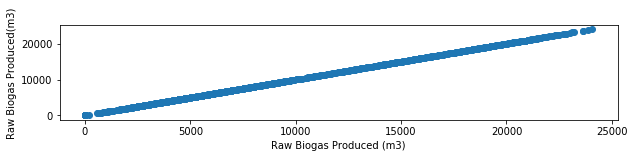

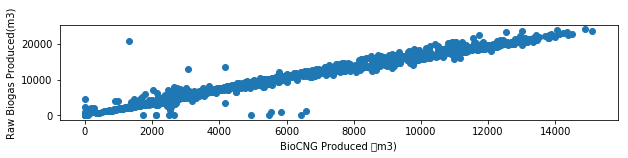

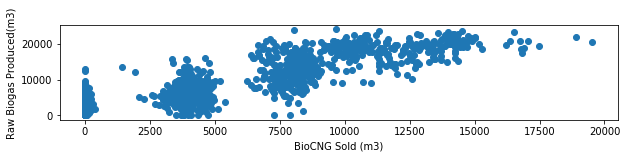

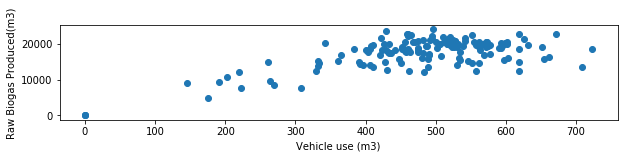

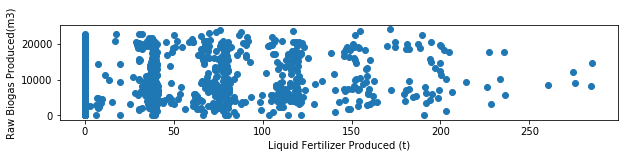

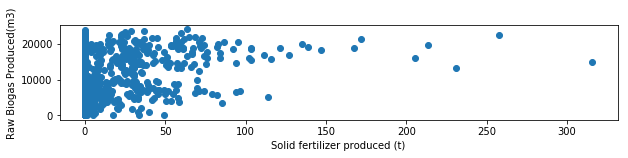

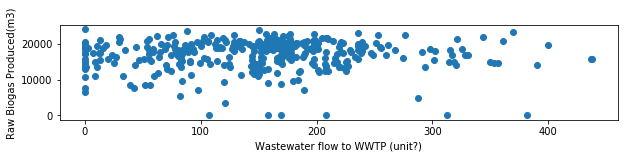

In [8]:
for i in columns_out:    
    fig2 = plt.figure(figsize = (10,50))
    fig2.add_subplot(l,1,1) #.set_title(i)
    plt.scatter(h_df[i],h_df['Raw Biogas Produced (m3)'])
    plt.ylabel('Raw Biogas Produced(m3)')
    plt.xlabel(i)
    index = index + 1

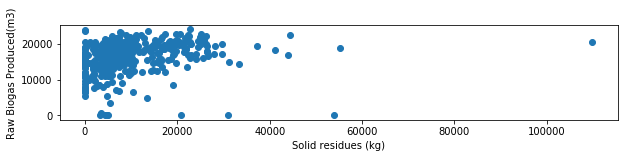

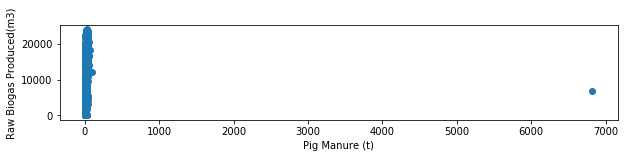

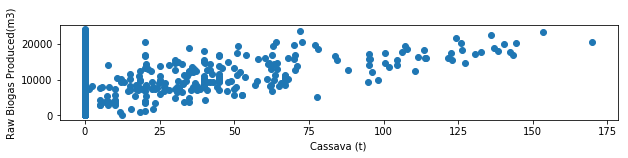

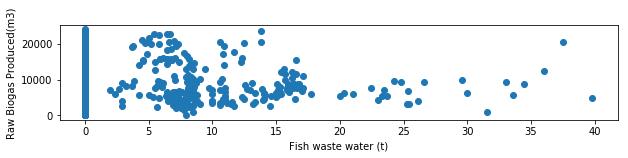

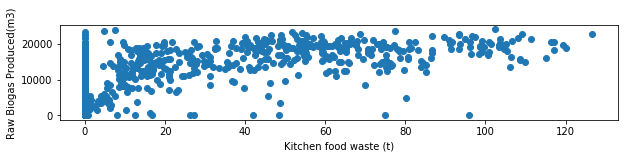

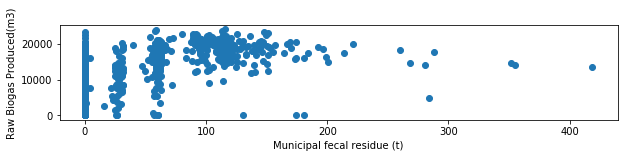

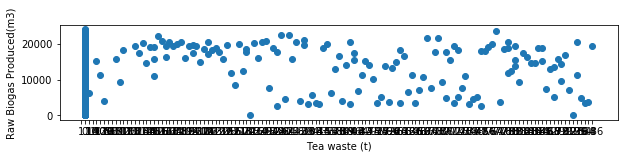

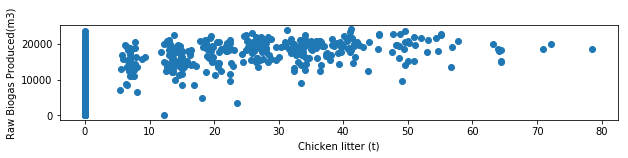

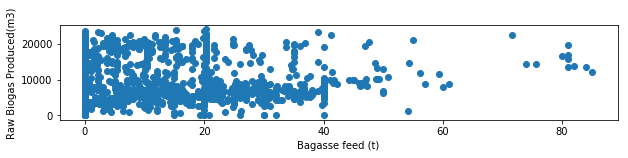

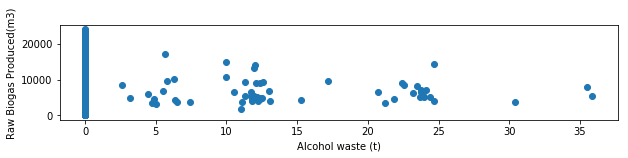

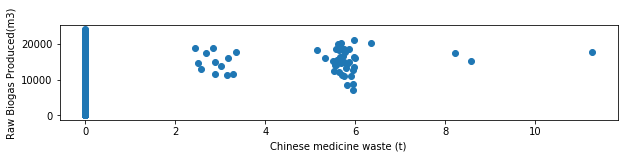

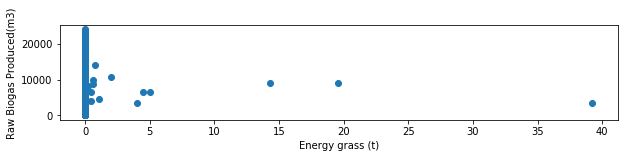

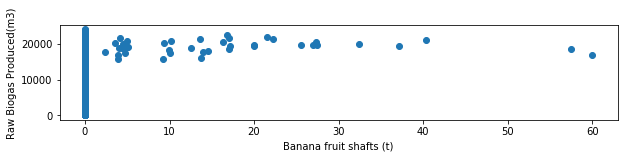

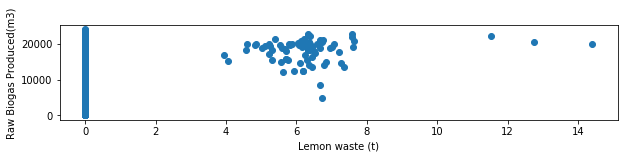

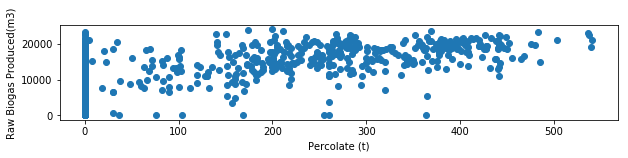

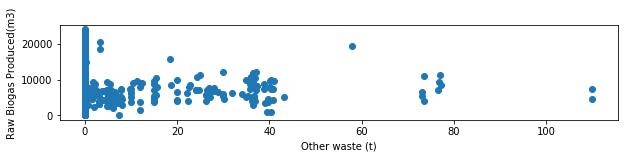

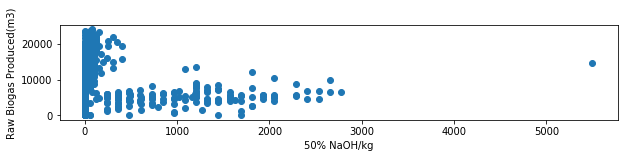

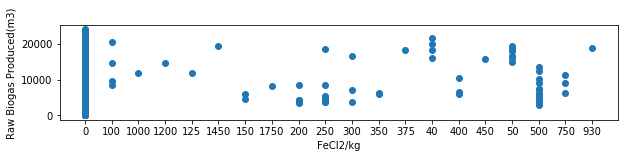

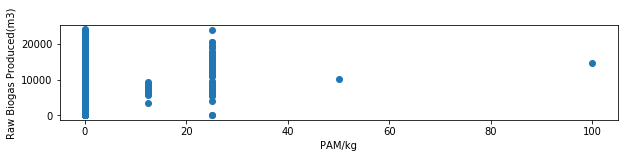

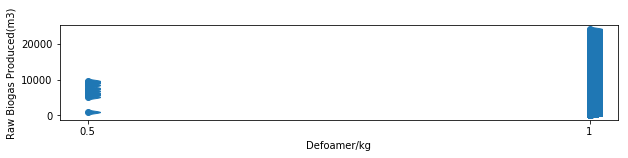

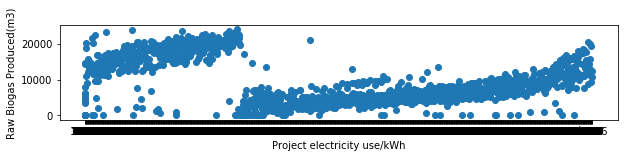

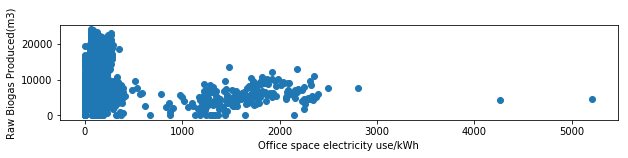

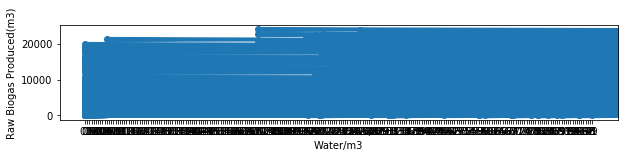

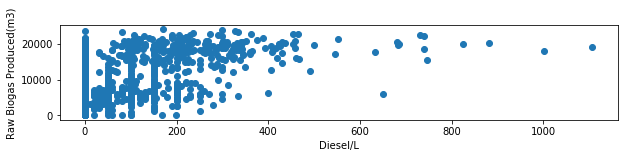

In [9]:
for i in columns_in:    
    fig2 = plt.figure(figsize = (10,50))
    fig2.add_subplot(l,1,1) #.set_title(i)
    plt.scatter(h_df[i],h_df['Raw Biogas Produced (m3)'])
    plt.ylabel('Raw Biogas Produced(m3)')
    plt.xlabel(i)
    index = index + 1

In [140]:
h_df.describe()

,Year,Day,Month #,Day #,Raw Biogas Produced (m3),BioCNG Produced （m3),BioCNG Sold (m3),Vehicle use (m3),Liquid Fertilizer Produced (t),Solid fertilizer produced (t),Wastewater flow to WWTP (unit?),Solid residues (kg),Pig Manure (t),Cassava (t),Fish waste water (t),Kitchen food waste (t),Municipal fecal residue (t),Chicken litter (t),Bagasse feed (t),Alcohol waste (t),Chinese medicine waste (t),Energy grass (t),Banana fruit shafts (t),Lemon waste (t),Percolate (t),Other waste (t),50% NaOH/kg,PAM/kg,Office space electricity use/kWh,Diesel/L
count,1428.000000,1428.000000,1398.000000,1398.00000,1428.000000,1428.000000,1428.000000,149.000000,1425.000000,1428.000000,363.000000,422.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1424.000000,1424.000000,1428.000000,1428.000000,1428.000000,1427.000000,1428.000000
mean,2015.694678,15.707283,23.434192,699.50000,9164.641349,5338.099769,5389.555126,473.874765,40.170442,9.554356,149.815427,10028.717536,18.775015,8.804804,2.000308,15.256331,27.020230,6.453599,12.215052,0.642759,0.204685,0.065238,0.469328,0.354213,78.684480,2.681961,133.506284,1.470588,349.698388,73.510406
std,1.161421,8.795012,13.253906,403.71215,6247.605737,3850.362431,4193.273958,123.996377,54.618185,25.095226,86.956276,9962.483719,180.468618,23.997959,5.078167,27.691333,49.536515,13.596789,14.497685,3.434454,1.068011,1.238533,3.583770,1.505154,136.664537,10.084861,411.378506,6.210327,582.098121,125.266423
min,2014.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,8.000000,12.000000,350.25000,4184.500000,2361.500000,3441.250000,429.680000,0.000000,0.000000,86.000000,4010.000000,5.675000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000
50%,2016.000000,16.000000,23.000000,699.50000,7136.000000,3912.000000,4182.605000,489.000000,0.000000,0.000000,157.000000,7530.000000,11.710000,0.000000,0.000000,0.000000,0.000000,0.000000,6.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,0.000000
75%,2017.000000,23.000000,35.000000,1048.75000,14513.750000,8552.000000,8290.000000,552.000000,72.900000,4.910000,198.000000,14785.000000,20.460000,0.000000,0.000000,16.840000,57.135000,0.000000,20.250000,0.000000,0.000000,0.000000,0.000000,0.000000,151.000000,0.000000,75.000000,0.000000,258.000000,105.250000
max,2018.000000,31.000000,46.000000,1398.00000,24068.000000,15100.000000,19529.000000,723.000000,285.420000,315.760000,438.000000,109820.000000,6820.000000,169.890000,39.800000,126.640000,418.650000,78.540000,85.050000,35.860000,11.260000,39.220000,60.000000,14.400000,541.000000,110.020000,5498.000000,100.000000,5211.000000,1107.000000


In [141]:
#for i in range(0,h_df['Chicken litter (t)'].count()):
#    print(h_df['Chicken litter (t)'][i])
h_df.head()

,Year,Month,Day,Month #,Day #,Raw Biogas Produced (m3),BioCNG Produced （m3),BioCNG Sold (m3),Vehicle use (m3),Liquid Fertilizer Produced (t),Solid fertilizer produced (t),Wastewater flow to WWTP (unit?),Solid residues (kg),Pig Manure (t),Cassava (t),Fish waste water (t),Kitchen food waste (t),Municipal fecal residue (t),Tea waste (t),Chicken litter (t),Bagasse feed (t),Alcohol waste (t),Chinese medicine waste (t),Energy grass (t),Banana fruit shafts (t),Lemon waste (t),Percolate (t),Other waste (t),50% NaOH/kg,FeCl2/kg,PAM/kg,Defoamer/kg,Project electricity use/kWh,Office space electricity use/kWh,Water/m3,Diesel/L
0,2014,April,1,NaN,NaN,5154.0,1710.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0
1,2014,April,2,NaN,NaN,3426.0,1529.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0
2,2014,April,3,NaN,NaN,5885.0,1795.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0
3,2014,April,4,NaN,NaN,3727.0,1361.0,0.0,NaN,0.0,0.0,NaN,NaN,14.9,0.0,0.0,0.0,0.0,0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0
4,2014,April,5,NaN,NaN,4072.0,2436.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0
